# Katz centrality

In [1]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer
import math
import scipy.stats as stats
import pandas as pd
import sklearn
from sklearn import preprocessing

## Algorithm

In [2]:
def katz(G, max_num_of_steps, tolerance, alpha, beta):
    '''Computes the Katz centrality for the nodes of the graph G.'''
    start = timer()
    A = nx.adjacency_matrix(G)
    diff = 1000
    k = 0
    vector = np.ones((A.shape[1], 1))
    r = beta * vector
    while diff > tolerance and k < max_num_of_steps:
        # inner product of matrix A and vector r
        r, q = alpha*A.dot(r), r
        diff = np.linalg.norm(q-r, ord=1)
        k += 1
    print('process finished after {} iterations'.format(k))
    end = timer()
    # timing of the process
    print('time consumption: {} seconds'.format(end-start))
    return r

### Small example

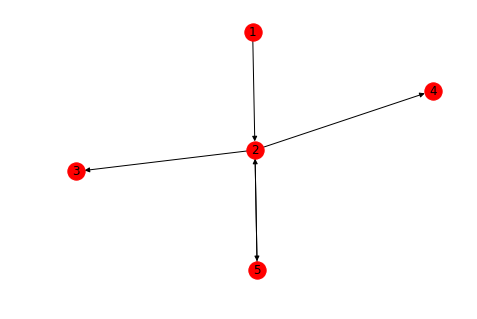

[[0 1 0 0 0]
 [0 0 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]]


In [4]:
T = nx.DiGraph()   # or DiGraph, etc
T.add_edges_from(((1, 2), (2, 3), (2, 4), (2, 5), (5, 2)))
nx.draw(T, with_labels=True)
plt.show()
print(nx.adjacency_matrix(T).todense())

In [9]:
test = katz(T, 100, 0.1, 0.002,1)
rank(test)

process finished after 2 iterations
time consumption: 0.0007862040000006232 seconds


array([[3],
       [2],
       [0],
       [1],
       [4]], dtype=int64)

In [8]:
test1 = katz(T, 100, 0.1, 0.002,5)
rank(test1)

process finished after 2 iterations
time consumption: 0.0011531370000028573 seconds


array([[3],
       [2],
       [0],
       [1],
       [4]], dtype=int64)

In [7]:
def rank(array):
    '''Returns vector with ranked values of array,
    where 0 is the minimum value of array'''
    temp = array.argsort(axis=0)
    ranks = temp.argsort(axis=0)
    return ranks

In [59]:
rank(test)

array([[3],
       [2],
       [0],
       [1],
       [4]], dtype=int64)

### Katz centrality on networks

In [10]:
#citation:@misc{snapnets,
#  author       = {Jure Leskovec and Andrej Krevl},
#  title        = {{SNAP Datasets}: {Stanford} Large Network Dataset Collection},
#  howpublished = {\url{http://snap.stanford.edu/data}},
#  month        = jun,
#  year         = 2014
#}
G_fb = nx.read_edgelist('facebook_combined.txt')

In [72]:
M_fb = nx.adjacency_matrix(G_fb)
print(M_fb)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  (0, 25)	1
  :	:
  (4031, 4024)	1
  (4031, 4027)	1
  (4032, 1827)	1
  (4032, 4028)	1
  (4033, 1827)	1
  (4033, 3989)	1
  (4033, 4002)	1
  (4034, 1827)	1
  (4034, 4024)	1
  (4035, 1827)	1
  (4036, 1827)	1
  (4036, 4001)	1
  (4037, 1827)	1
  (4037, 3985)	1
  (4037, 4015)	1
  (4037, 4021)	1
  (4038, 1827)	1
  (4038, 1828)	1
  (4038, 1830)	1
  (4038, 4006)	1
  (4038, 4014)	1
  (4038, 4015)	1
  (4038, 4021)	1
  (4038, 4024)	1
  (4038, 4028)	1


In [11]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [ ]:
spring_pos = nx.spring_layout(G_fb)
nx.draw(G_fb, pos = spring_pos, node_size = 35)
plt.show()

In [78]:
np.amax(np.linalg.eigvals(M_fb.todense()))

(162.37394233563828+0j)

In [79]:
1/162.37394233563828

0.006158623641304035

Vzamem alpha < 1/163 = 0.00613

Vemo, da je maksimalna lastna vrednost matrike sosednosti omejena z maksimalnim številom stopenj vseh vozlišč. V informacijah o grafu vidimo, da je povprečna stopnja vozlišča enaka 43.6910. Poskusimo z alfo manjšo od 1/43.6910 oziroma 0.0229.

In [62]:
r1 = katz(G_fb, 10000000, 0.01, 0.0062, 1)
rank(r1)

process finished after 105184 iterations
time consumption: 209.5044313590006 seconds


c:\users\tina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


array([[3238],
       [1977],
       [1787],
       ...,
       [ 217],
       [ 232],
       [ 695]], dtype=int64)

In [63]:
r2 = katz(G_fb, 100000, 0.01, 0.0061, 1)
rank(r2)

process finished after 571 iterations
time consumption: 1.6107811239999137 seconds


array([[3238],
       [1977],
       [1787],
       ...,
       [ 217],
       [ 232],
       [ 695]], dtype=int64)

Pri alpha = 0.0061 konvergira pri alpha = 0.0062 pa že divergira.

In [64]:
r3 = katz(G_fb, 10000000, 0.01, 0.003, 1)
rank(r3)

process finished after 15 iterations
time consumption: 0.3936579139999594 seconds


array([[2796],
       [1633],
       [1170],
       ...,
       [ 215],
       [ 230],
       [ 258]], dtype=int64)

In [65]:
r4 = katz(G_fb, 100000, 0.01, 0.001, 1)
rank(r4)

process finished after 7 iterations
time consumption: 0.4406213860002026 seconds


array([[2431],
       [ 971],
       [ 766],
       ...,
       [  11],
       [  26],
       [  54]], dtype=int64)

In [66]:
r5 = katz(G_fb, 100000, 0.01, 0.0001, 1)
rank(r5)

process finished after 4 iterations
time consumption: 0.4093632260000959 seconds


array([[2632],
       [ 805],
       [ 287],
       ...,
       [  11],
       [  27],
       [  38]], dtype=int64)

In [67]:
r6 = katz(G_fb, 100000, 0.01, 0.000000001, 1)
rank(r6)

process finished after 2 iterations
time consumption: 0.4293966429995635 seconds


array([[3291],
       [ 897],
       [ 396],
       ...,
       [  12],
       [  37],
       [  66]], dtype=int64)

In [68]:
r7 = katz(G_fb, 100000, 0.01, 0.000000000000000001, 1)
rank(r7)

process finished after 2 iterations
time consumption: 0.35789131199999247 seconds


array([[3291],
       [ 897],
       [ 396],
       ...,
       [  12],
       [  37],
       [  66]], dtype=int64)

In [12]:
#graph of time of katz algorithm depending on alpha

def katz2(G, max_num_of_steps, tolerance, alpha, beta):
    '''Computes the Katz centrality for the nodes of the graph G.'''
    start = timer()
    A = nx.adjacency_matrix(G)
    # first guess for vector r is first column of A
    r = A[:, 0]  
    diff = 1000
    k = 0
    vector = np.ones((A.shape[1], 1))
    while diff > tolerance and k < max_num_of_steps:
        # inner product of matrix A and vector r
        r, q = alpha*A.dot(r) + beta * vector, r
        diff = np.linalg.norm(q-r, ord=1)
        k += 1
    #normalized_r = preprocessing.normalize(r, axis=0, norm ='l1')
    print('process finished after {} iterations'.format(k))
    end = timer()
    # timing of the process
    print('time consumption: {} seconds'.format(end-start))
    return (end-start, k)

timings = {}
for alpha in range (0, 613, 10):
    timings[alpha/100000] = katz2(G_fb, 100000, 0.0000001, alpha/100000, 1)

process finished after 2 iterations
time consumption: 0.3641911849999957 seconds
process finished after 7 iterations
time consumption: 0.4271040210000052 seconds
process finished after 8 iterations
time consumption: 0.41307522500000005 seconds
process finished after 9 iterations
time consumption: 0.37540568800000074 seconds
process finished after 9 iterations
time consumption: 0.41731515200000047 seconds
process finished after 10 iterations
time consumption: 0.42831859800000416 seconds
process finished after 11 iterations
time consumption: 0.39555572800000505 seconds
process finished after 11 iterations
time consumption: 0.4299814600000005 seconds
process finished after 12 iterations
time consumption: 0.4212575509999965 seconds
process finished after 13 iterations
time consumption: 0.43591155600000064 seconds
process finished after 13 iterations
time consumption: 0.4093438840000019 seconds
process finished after 14 iterations
time consumption: 0.4519195160000038 seconds
process finishe

In [13]:
iterations= [i[1] for i in timings.values()]
iterations

[2,
 7,
 8,
 9,
 9,
 10,
 11,
 11,
 12,
 13,
 13,
 14,
 15,
 15,
 16,
 17,
 18,
 18,
 19,
 20,
 21,
 22,
 23,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 40,
 42,
 44,
 46,
 49,
 52,
 55,
 58,
 62,
 66,
 70,
 76,
 81,
 88,
 96,
 105,
 116,
 129,
 145,
 166,
 193,
 229,
 281,
 362,
 505,
 830,
 2261]

In [14]:
timings

{0.0: (0.3641911849999957, 2),
 0.0001: (0.4271040210000052, 7),
 0.0002: (0.41307522500000005, 8),
 0.0003: (0.37540568800000074, 9),
 0.0004: (0.41731515200000047, 9),
 0.0005: (0.42831859800000416, 10),
 0.0006: (0.39555572800000505, 11),
 0.0007: (0.4299814600000005, 11),
 0.0008: (0.4212575509999965, 12),
 0.0009: (0.43591155600000064, 13),
 0.001: (0.4093438840000019, 13),
 0.0011: (0.4519195160000038, 14),
 0.0012: (0.49346944200000564, 15),
 0.0013: (0.4318599309999982, 15),
 0.0014: (0.3923625549999983, 16),
 0.0015: (0.4541063239999943, 17),
 0.0016: (0.4540465910000009, 18),
 0.0017: (0.39251956900000096, 18),
 0.0018: (0.49679402699999287, 19),
 0.0019: (0.47691933100000483, 20),
 0.002: (0.3980042250000082, 21),
 0.0021: (0.44763009499999384, 22),
 0.0022: (0.44983510800000204, 23),
 0.0023: (0.3906081020000016, 23),
 0.0024: (0.45704406499999095, 24),
 0.0025: (0.4640436720000025, 25),
 0.0026: (0.4434407989999869, 27),
 0.0027: (0.42483187899999564, 28),
 0.0028: (0.4764

Pri alpha = 0.0062 ponori.

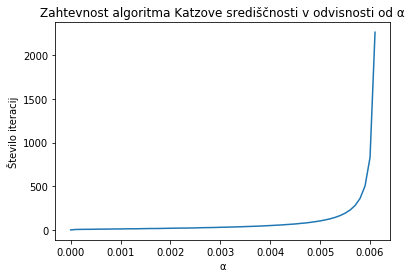

In [15]:
plt.plot(timings.keys(), iterations)
plt.xlabel('α')
plt.ylabel('Število iteracij')
plt.title('Zahtevnost algoritma Katzove središčnosti v odvisnosti od α')
plt.savefig('Katz_alpha.png')
plt.show()